In [1]:
import pandas as pd

In [2]:
religion_dfs = pd.read_html("https://en.wikipedia.org/wiki/Religions_by_country")

In [125]:
relevant_dfs = []

In [126]:
for df in religion_dfs:
    try:
        if df.columns[0]==('Country', 'Country'):
            relevant_dfs += [df]
    except ValueError:
        continue

In [127]:
religion_df = pd.concat(relevant_dfs)

In [128]:
index_col = ("Country","Country")

In [129]:
religion_df = religion_df.sort_values(index_col)

In [130]:
religion_df = religion_df.set_index(index_col)

In [131]:
religion_df

Population  \
                                                                                           Population   
(Country, Country)                                                                                      
* Only includes the population of religious aff...  * Only includes the population of religious af...   
Afghanistan                                                                                  31415280   
Albania                                                                                       2800138   
Algeria                                                                                      43851044   
American Samoa                                                                                  70920   
...                                                                                               ...   
Wallis and Futuna                                                                               13000   
Western Africa                                                                              304264000   
Yemen                                                                                        24050000   
Zambia                                                                                       20216029   
Zimbabwe                                                                                     16775307   

                                                                                            Christian  \
                                                                                                 Pop.   
(Country, Country)                                                                                      
* Only includes the population of religious aff...  * Only includes the population of religious af...   
Afghanistan                                                                                     30000   
Albania                                                                                        475529   
Algeria                                                                                        419570   
American Samoa                                                                                  68860   
...                                                                                               ...   
Wallis and Futuna                                                                               12662   
Western Africa                                                                              123748360   
Yemen                                                                                           48100   
Zambia                                                                                       19730844   
Zimbabwe                                                                                     14678393   

                                                                                                       \
                                                                                                    %   
(Country, Country)                                                                                      
* Only includes the population of religious aff...  * Only includes the population of religious af...   
Afghanistan                                                                                      0.01   
Albania                                                                                         16.95   
Algeria                                                                                           1.0   
American Samoa                                                                                  98.30   
...                                                                                               ...   
Wallis and Futuna                                                                               97.40   
Western Africa                                                                                  40.

In [16]:
gdp_dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita")

In [175]:
gdp_df = gdp_dfs[1]

In [176]:
index_col = ("Country/Territory","Country/Territory")

In [177]:
gdp_df[index_col] = gdp_df[index_col].str.strip(' *')

In [178]:
gdp_df = gdp_df.sort_values(index_col)

In [179]:
gdp_df = gdp_df.set_index(index_col)

In [180]:
gdp_df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name=('Country/Territory', 'Country/Territory'), length=230)

In [17]:
homicide_dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate")

In [67]:
homicide_df = homicide_dfs[1]

In [185]:
index_col = "Location"

In [186]:
homicide_df[index_col] = homicide_df[index_col].str.strip(' *')

In [189]:
homicide_df = homicide_df.set_index(index_col)

In [191]:
homicide_df

,Rate,Count,Year,Region,Subregion
Location,,,,,
Afghanistan,4.0,1613,2021,Asia,Southern Asia
Albania,1.7,47,2022,Europe,Southern Europe
Algeria,1.8,795,2022,Africa,Northern Africa
American Samoa,0.0,0,2019,Oceania,Polynesia
Andorra,2.6,2,2020,Europe,Southern Europe
...,...,...,...,...,...
Venezuela,19.3,5444,2021,Americas,Latin America and the Caribbean
Vietnam,1.5,1358,2011,Asia,South-eastern Asia
Yemen,6.3,1703,2013,Asia,Western Asia


In [221]:
df = religion_df

In [223]:
df['gdp'] = gdp_df[("World Bank[7]","Estimate")]

In [224]:
df['homicide'] = homicide_df["Rate"]

In [225]:
# df.dropna(subset=[('gdp','')])

In [226]:
# df.dropna(subset=[('homicide','')])

In [227]:
df = df.iloc[1:]

In [254]:
df.columns

MultiIndex([(           'Population', 'Population'),
            (            'Christian',       'Pop.'),
            (            'Christian',          '%'),
            (               'Muslim',       'Pop.'),
            (               'Muslim',          '%'),
            (           'Irreligion',       'Pop.'),
            (           'Irreligion',          '%'),
            (                'Hindu',       'Pop.'),
            (                'Hindu',          '%'),
            (             'Buddhist',       'Pop.'),
            (             'Buddhist',          '%'),
            (        'Folk religion',       'Pop.'),
            (        'Folk religion',          '%'),
            (       'Other religion',       'Pop.'),
            (       'Other religion',          '%'),
            (               'Jewish',       'Pop.'),
            (               'Jewish',          '%'),
            ('Not Stated/Undeclared',       'Pop.'),
            ('Not Stated/Undeclared',         

In [201]:
df[("Muslim","%")] = df[("Muslim","%")].str.strip('%')

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/2635638964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("Muslim","%")] = df[("Muslim","%")].str.strip('%')


In [231]:
df[("Muslim","%")] = pd.to_numeric(df[("Muslim","%")], errors="coerce")

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/2754048608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("Muslim","%")] = pd.to_numeric(df[("Muslim","%")], errors="coerce")


In [243]:
df[("Christian","%")] = pd.to_numeric(df[("Christian","%")], errors="coerce")

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/272398104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("Christian","%")] = pd.to_numeric(df[("Christian","%")], errors="coerce")


In [247]:
df[("Irreligion","%")] = pd.to_numeric(df[("Irreligion","%")], errors="coerce")

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/2720879457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("Irreligion","%")] = pd.to_numeric(df[("Irreligion","%")], errors="coerce")


In [251]:
df[("Hindu","%")] = pd.to_numeric(df[("Hindu","%")], errors="coerce")

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/485808070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("Hindu","%")] = pd.to_numeric(df[("Hindu","%")], errors="coerce")


In [255]:
df[("Pagan","%")] = pd.to_numeric(df[("Pagan","%")], errors="coerce")

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/3840775118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("Pagan","%")] = pd.to_numeric(df[("Pagan","%")], errors="coerce")


In [258]:
df[("Paganism/Neo-Paganism","%")] = pd.to_numeric(df[("Paganism/Neo-Paganism","%")], errors="coerce")

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/2710062769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("Paganism/Neo-Paganism","%")] = pd.to_numeric(df[("Paganism/Neo-Paganism","%")], errors="coerce")


In [234]:
df[("gdp","")] = pd.to_numeric(df[("gdp","")], errors="coerce")

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_897/2549049318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("gdp","")] = pd.to_numeric(df[("gdp","")], errors="coerce")


In [260]:
df[[("Paganism/Neo-Paganism","%"),("homicide","")]].corr()

,,Paganism/Neo-Paganism,homicide
,,%,
Paganism/Neo-Paganism,%,1.000000,0.260153
homicide,,0.260153,1.000000


<Axes: xlabel='(Paganism/Neo-Paganism, %)', ylabel='(homicide, )'>

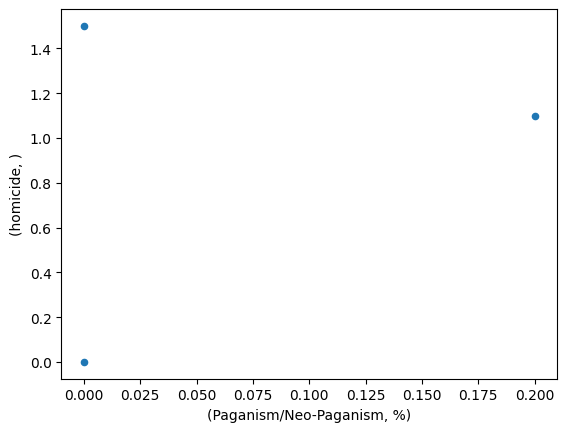

In [259]:
df[[("Paganism/Neo-Paganism","%"),("homicide","")]].plot.scatter(x=("Paganism/Neo-Paganism","%"),y=("homicide",""))

In [232]:
df[[("Muslim","%"),("homicide","")]].corr()

,,Muslim,homicide
,,%,
Muslim,%,1.000000,-0.263938
homicide,,-0.263938,1.000000


<Axes: xlabel='(Muslim, %)', ylabel='(homicide, )'>

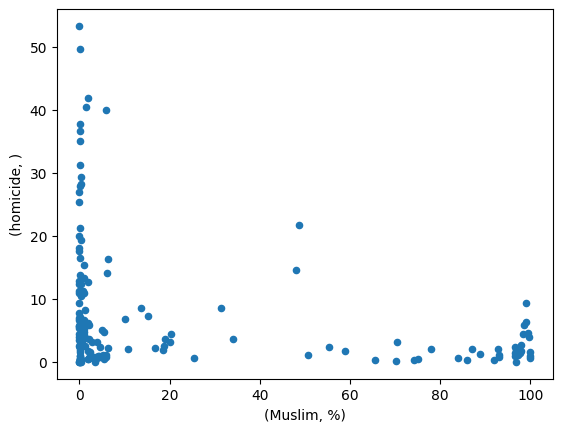

In [239]:
df[[("Muslim","%"),("homicide","")]].plot.scatter(x=("Muslim","%"),y=("homicide",""))

In [235]:
df[[("gdp",""),("homicide","")]].corr()

,,gdp,homicide
,,,
gdp,,1.000000,-0.218611
homicide,,-0.218611,1.000000


In [245]:
df[[("Christian","%"),("homicide","")]].corr()

,,Christian,homicide
,,%,
Christian,%,1.000000,0.339596
homicide,,0.339596,1.000000


<Axes: xlabel='(Christian, %)', ylabel='(homicide, )'>

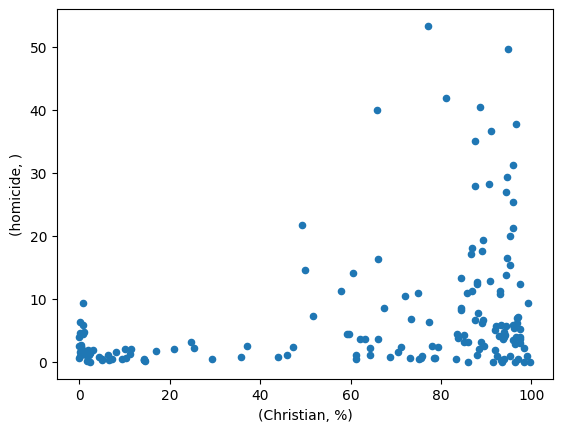

In [244]:
df[[("Christian","%"),("homicide","")]].plot.scatter(x=("Christian","%"),y=("homicide",""))

In [245]:
df[[("Hindu","%"),("homicide","")]].corr()

,,Christian,homicide
,,%,
Christian,%,1.000000,0.339596
homicide,,0.339596,1.000000


<Axes: xlabel='(Hindu, %)', ylabel='(homicide, )'>

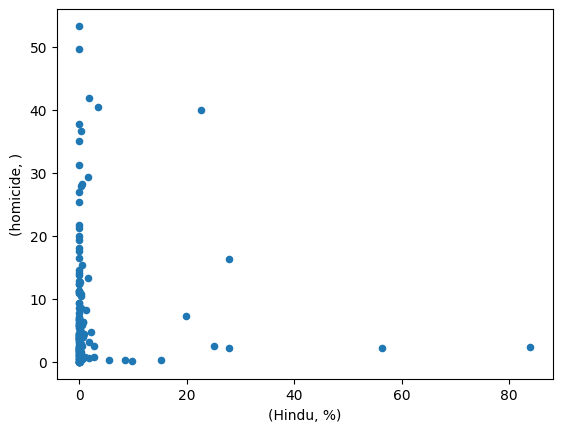

In [252]:
df[[("Hindu","%"),("homicide","")]].plot.scatter(x=("Hindu","%"),y=("homicide",""))

In [250]:
df[[("Irreligion","%"),("homicide","")]].corr()

,,Irreligion,homicide
,,%,
Irreligion,%,1.000000,-0.086801
homicide,,-0.086801,1.000000


<Axes: xlabel='(Irreligion, %)', ylabel='(homicide, )'>

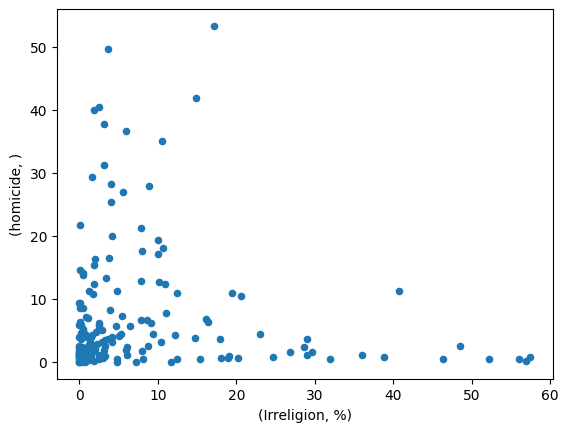

In [248]:
df[[("Irreligion","%"),("homicide","")]].plot.scatter(x=("Irreligion","%"),y=("homicide",""))

<Axes: xlabel='(gdp, )', ylabel='(homicide, )'>

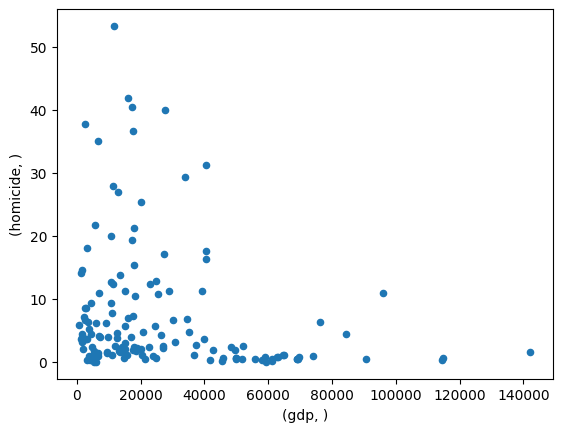

In [240]:
df[[("gdp",""),("homicide","")]].plot.scatter(x=("gdp",""),y=("homicide",""))